# Image Captioning + Segmentation Project (Colab-Ready)

# 🧩 STEP 1: Install Required Libraries

In [1]:
!pip install transformers torchvision torchaudio
!pip install sentencepiece
!pip install git+https://github.com/huggingface/transformers.git
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

# 🖼️ STEP 2: Upload Image

In [3]:
from google.colab import files
from PIL import Image
from io import BytesIO

uploaded = files.upload()

for fname in uploaded.keys():
    image = Image.open(BytesIO(uploaded[fname])).convert("RGB")
    image = image.resize((512, 512))  # resize for segmentation
    image.show()


Saving sample1.jpg to sample1.jpg


# 🧠 STEP 3: Image Captioning using BLIP

In [4]:
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

inputs = processor(images=image, return_tensors="pt")
out = model.generate(**inputs)
caption = processor.decode(out[0], skip_special_tokens=True)

print("📝 Caption:", caption)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

📝 Caption: a dog sitting on a couch with a blanket


# 🧠 STEP 4: Image Segmentation using DeepLabV3

✅ Detected class indices: [0, 12, 15, 18]


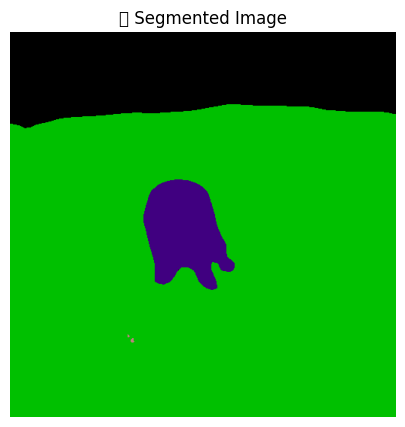


### ✅ Summary
This project demonstrates an end-to-end pipeline for:
- **Image Captioning** using a pretrained BLIP model (trained on MS COCO)
- **Image Segmentation** using DeepLabV3-ResNet101 (trained on PASCAL VOC)

Tasks are performed using PyTorch, Transformers, and standard vision libraries in a Google Colab environment.


In [8]:
import torchvision.transforms as T
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np

# Load pretrained DeepLabV3 model
deeplab = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

# Transform image
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0)

# Generate segmentation
with torch.no_grad():
    output = deeplab(input_tensor)['out'][0]
segmentation = output.argmax(0)

# Check which classes are detected
unique_labels = torch.unique(segmentation)
print("\u2705 Detected class indices:", unique_labels.tolist())

# PASCAL VOC 21-class colormap
VOC_COLORMAP = np.array([
    (0, 0, 0), (128, 0, 0), (0, 128, 0), (128, 128, 0),
    (0, 0, 128), (128, 0, 128), (0, 128, 128), (128, 128, 128),
    (64, 0, 0), (192, 0, 0), (64, 128, 0), (192, 128, 0),
    (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
    (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0),
    (0, 64, 128)
], dtype=np.uint8)

def decode_segmap(mask):
    h, w = mask.shape
    rgb = np.zeros((h, w, 3), dtype=np.uint8)
    for label in range(len(VOC_COLORMAP)):
        rgb[mask == label] = VOC_COLORMAP[label]
    return rgb

# Decode and plot segmentation
decoded = decode_segmap(segmentation.numpy())
plt.figure(figsize=(10, 5))
plt.imshow(decoded)
plt.axis('off')
plt.title("\U0001F9E9 Segmented Image")
plt.show()

# ✅ STEP 5: Summary
from IPython.display import Markdown
Markdown("""
### ✅ Summary
This project demonstrates an end-to-end pipeline for:
- **Image Captioning** using a pretrained BLIP model (trained on MS COCO)
- **Image Segmentation** using DeepLabV3-ResNet101 (trained on PASCAL VOC)

Tasks are performed using PyTorch, Transformers, and standard vision libraries in a Google Colab environment.
""")